# <center>Using SQL with Python dataframes and Pandas via pandasql</center>
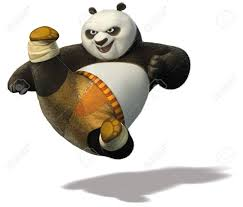
# <center>Approach 1:  Just the basics using pandas</center>

### Documentation at: https://pypi.org/project/pysqldf/

### Use Cases
- Don't want to use SQL database tables but want to use SQL
- Data fits in memory
- Volume of data not a performance issue
- Don't need a fully functional SQL Server database

### https://github.com/yhat/pandasql/tree/master/examples

In [1]:
import pandas as pd
from pandasql import sqldf
from pandasql import load_births

births = load_births()

print(sqldf("SELECT * FROM births where births > 250000 limit 5;", locals()))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-03-01 00:00:00.000000  268849
2  1975-05-01 00:00:00.000000  254545
3  1975-06-01 00:00:00.000000  254096
4  1975-07-01 00:00:00.000000  275163


## Let's try a query that spans multiple lines...

### Note:  This is standard ANSI SQL.

In [2]:
q = """
      select
        date(date) as DOB,
        sum(births) as "Total Births"
      from
        births
      group by
        date
        limit 10;  
"""

print(sqldf(q, locals()))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


In [3]:
print(sqldf(q, globals()))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


# globals() vs. locals()


Link: https://stackoverflow.com/questions/32032534/about-pandasql-locals-and-globals-method-issue

locals() and globals() are python built-in functions that are used to return the corresponding namespace.

In Python , Namespace is a way to implement scope. So global namespace means global scope, so variables(names) defined there are visible throughout the module.

local namepsace is the namespace that is local to a particular function.

globals() returns a dictionary representing the current global namespace.

locals()'s return depends on where it is called, when called directly inside the script scope (not inside a particular function) it returns the same dictionary as globals() that is the global namespace. When called inside a function it returns the local namespace.

In pandasql , the second argument you need to pass is basically this namespace (dictionary) that contains the variables that you are using in the query. That is lets assume you create a DataFrame called a , and then write your query on it. Then pandasql needs to know the DataFrame that corresponds to the name a for this it needs the local/global namespace, and that is what the second argument is for.

So you need to decide what to pass in, example , if your DataFrame is only defined inside a function and does not exist in global scope, you need to pass in locals() return dictionary, If your DataFrame exists in global scope, you need to pass in result of globals() .

In [4]:
# locals vs. globals and making calling pysqldf a bit easier...

def pysqldf(q):
    "add this to your script if you get tired of calling locals()"
    return sqldf(q, globals())

### Note:  RIGHT and FULL OUTER JOINs are not currently supported

In [5]:
print(pysqldf(q))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


## Let's use our own data...
## We'll use pandas to load it in...

In [2]:
%pwd

'D:\\DocumentsD\\Presentations\\PythonSQL\\Notebook'

In [3]:
import pandas as pd

filepath = './Data/'

dfcustomer = pd.read_csv(filepath + 'DimCustomer.csv')

In [4]:
dfcustomer.head(3)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles


## Eliminating the index...

In [8]:
dfcustomer.set_index('CustomerKey',inplace=True)

In [10]:
dfcustomer.head()

,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,26,AW00011000,NaN,Jon,V,Yang,0,1971-10-06,M,NaN,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles
11001,37,AW00011001,NaN,Eugene,L,Huang,0,1976-05-10,S,NaN,...,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles
11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1971-02-09,M,NaN,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles
11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1973-08-14,S,NaN,...,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles
11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1979-08-05,S,NaN,...,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles


In [12]:
pysqldf("select * from dfcustomer limit 3;")

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,Professional,Profesional,Cadre,1,0,3761 N. 14th St,None,1 (11) 500 555-0162,2011-01-19,1-2 Miles
1,11001,37,AW00011001,None,Eugene,L,Huang,0,1976-05-10,S,...,Professional,Profesional,Cadre,0,1,2243 W St.,None,1 (11) 500 555-0110,2011-01-15,0-1 Miles
2,11002,31,AW00011002,None,Ruben,None,Torres,0,1971-02-09,M,...,Professional,Profesional,Cadre,1,1,5844 Linden Land,None,1 (11) 500 555-0184,2011-01-07,2-5 Miles


In [13]:
dfinternetsales = pd.read_csv(filepath + 'FactInternetSales.csv')
dfinternetsales.dtypes

ProductKey                 int64
OrderDateKey               int64
DueDateKey                 int64
ShipDateKey                int64
CustomerKey                int64
PromotionKey               int64
CurrencyKey                int64
SalesTerritoryKey          int64
SalesOrderNumber          object
SalesOrderLineNumber       int64
RevisionNumber             int64
OrderQuantity              int64
UnitPrice                float64
ExtendedAmount           float64
UnitPriceDiscountPct       int64
DiscountAmount             int64
ProductStandardCost      float64
TotalProductCost         float64
SalesAmount              float64
TaxAmt                   float64
Freight                  float64
CarrierTrackingNumber    float64
CustomerPONumber         float64
OrderDate                 object
DueDate                   object
ShipDate                  object
dtype: object

In [18]:
import pandas as pd
from pandasql import sqldf

print(pysqldf('''select FirstName, LastName, EnglishOccupation as "Job Title" from dfcustomer 
              order by LastName, FirstName limit 5'''))

   FirstName LastName       Job Title
0      Aaron    Adams  Skilled Manual
1       Adam    Adams      Management
2       Alex    Adams  Skilled Manual
3  Alexandra    Adams    Professional
4    Allison    Adams        Clerical


In [19]:
#  Joining dataframes with SQL

query = '''select * 
           from dfcustomer                     c
           left outer join dfinternetsales     s
                on (c.CustomerKey = s.CustomerKey) limit 3'''

pysqldf(query)

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,13.0863,13.0863,34.99,2.7992,0.8748,None,None,2013-05-03 00:00:00.000,2013-05-15 00:00:00.000,2013-05-10 00:00:00.000
1,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,None,None,2011-01-19 00:00:00.000,2011-01-31 00:00:00.000,2011-01-26 00:00:00.000
2,11000,26,AW00011000,None,Jon,V,Yang,0,1971-10-06,M,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,None,None,2013-01-18 00:00:00.000,2013-01-30 00:00:00.000,2013-01-25 00:00:00.000
